<p align = "center"><strong>NORMALITY ASSESSMENT <strong></p>

<p><b>By: Jefferson C.</p>

---

#### __1. Graphical Method__

Evalúa visualmente la distribución de los datos, __verifica si los datos se aproximan a una distribución Normal__ 

(Herramienta Exploratoria, no estadística)

__Gráficos más usados :__
- __Histogram :__ Observa la forma general de la distribución (simetría, sesgo, colas).

- __Box plot :__ Identifica la mediana, la dispersión (RIC) y posibles valores atípicos.

- __QQplot (Quantile - Quantile ) :__ Compara cuantiles empíricos con los de una distribución teórica 
    - _Cercanía a la recta :_ datos aproximadamente normales 
    - _No cercanía a la recta :_ presencia de NO normalidad 

__Sources :__
- StatsRef. *Statistical Reference Online*. Available at: https://www.statsref.com/HTML/index.html

- NIST/SEMATECH. *e-Handbook of Statistical Methods*. National Institute of Standards and Technology.

__Code :__

In [15]:
# INPUT 
import pandas as pd 
data = pd.DataFrame({
    "Resistencia_terreno": [
        78.65, 105.06, 105.94, 111.84, 115.93, 122.15, 121.39, 120.14,
        79.95, 83.44, 98.39, 109.58, 111.21, 113.10, 113.91, 111.09,
        85.65, 95.85, 107.67, 110.34
    ],
})

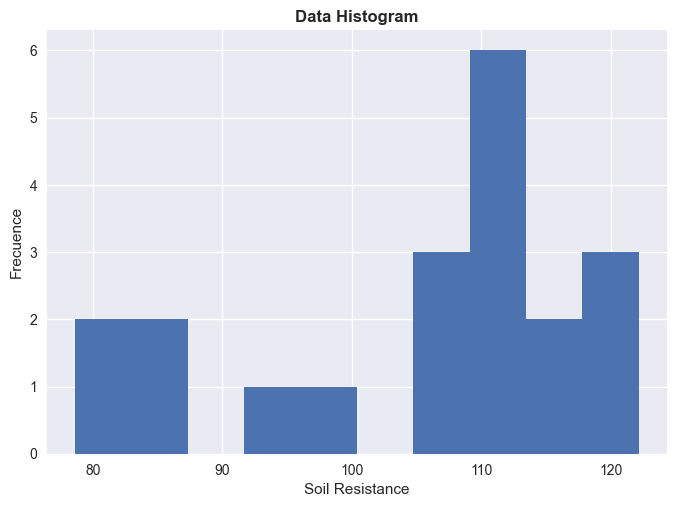

In [16]:
# HISTOGRAM 

import matplotlib.pyplot as plt 

# Style
plt.style.use('seaborn-v0_8')
# Graph
plt.hist(data['Resistencia_terreno'])
# Title and labels 
plt.title("Data Histogram",fontweight= 'bold')
plt.xlabel("Soil Resistance")
plt.ylabel("Frecuence")
plt.show()

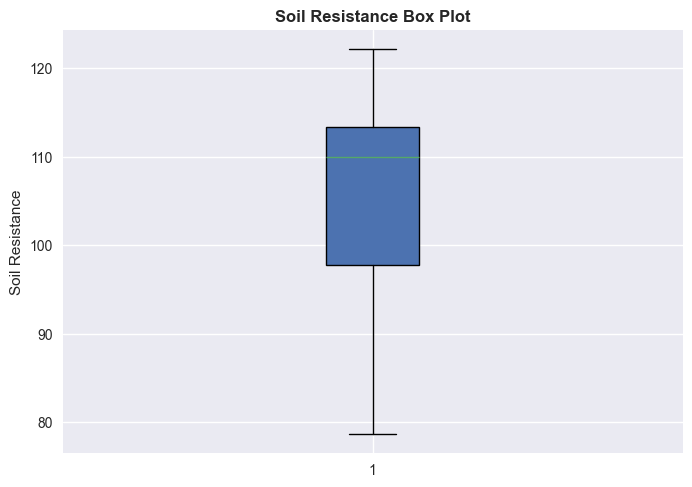

In [17]:
# BOX PLOT 

import matplotlib.pyplot as plt

# Style
plt.style.use('seaborn-v0_8')

# Box plot
plt.boxplot(
    data['Resistencia_terreno'],
    vert=True,
    patch_artist=True
)

# Title and labels
plt.title("Soil Resistance Box Plot", fontweight='bold')
plt.ylabel("Soil Resistance")

plt.show()

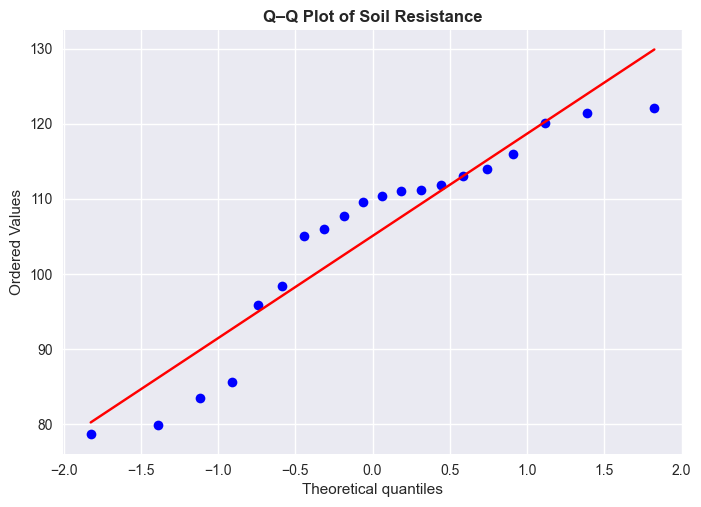

In [18]:
# QQ (QUANTILE - QUANTILE) PLOT 

import matplotlib.pyplot as plt
import scipy.stats as stats

# Style
plt.style.use('seaborn-v0_8')

# Q–Q plot
stats.probplot(data['Resistencia_terreno'], dist="norm", plot=plt)

# Title
plt.title("Q–Q Plot of Soil Resistance", fontweight='bold')

plt.show()

#### __2. Statistical Tests__
#### __2.1 Kolmogorov–Smirnov Test__

Prueba __NO PARAMÉTRICA__ de bondad de ajuste que compara la **distribución acumulada empírica** de una muestra con una **distribución teórica**, usualmente la Normal.

- __Hypotheses__

$$
H_0: F(x)=F_0(x)
\qquad
H_1: F(x)\neq F_0(x)
$$


- __Test statistic__

$$
D_n=\sup_x \left|F_n(x)-F_0(x)\right|
$$

donde $D_n$ es la **máxima diferencia absoluta** entre ambas distribuciones acumuladas.


- __Decision rule__

Se rechaza $H_0$ si

$$
p < \alpha
$$

(o equivalentemente si $D_n > D_{\alpha,n}$).


- __Normality case__

Para evaluar normalidad:

$$
F_0(x)=\Phi\!\left(\frac{x-\mu}{\sigma}\right)
$$

con $\mu$ y $\sigma$ estimados de la muestra.

__Nota__:  
- Cuando los parámetros se estiman a partir de los datos, debe utilizarse la **corrección de Lilliefors**.  
- La prueba KS es **menos potente** que Shapiro–Wilk para normalidad.

__Source:__

- StatsRef. *Statistical Reference Online*. Available at: https://www.statsref.com/HTML/index.html

- NIST/SEMATECH. *e-Handbook of Statistical Methods*. National Institute of Standards and Technology.

__Code :__

In [ ]:
# KOLGOMOROV-SMIRNOV (K-S) TEST

from scipy import stats
import numpy as np 

# Considering the parameters 
mu = np.mean(data['Resistencia_terreno'])
sigma = np.std(data['Resistencia_terreno'],axis=0,ddof=0)

# Kolmogorov–Smirnov test
k_stat , k_p = stats.kstest(data['Resistencia_terreno'], 'norm',args=(mu,sigma))
print(f'D-Statistic: {k_stat}\nP-value: {k_p}')

D-Statistic: 0.19987979625438967
P-value: 0.35342200153616476


#### __2.2 Lilliefors Test__

Prueba __NO PARAMÉTRICA__ de bondad de ajuste utilizada para evaluar la **normalidad** cuando los **parámetros de la distribución Normal (media y desviación estándar) son estimados a partir de la muestra**.  
Es una **modificación del test Kolmogorov–Smirnov**.

- __Hypotheses__

$$
H_0: F(x)=F_0(x)
\qquad
H_1: F(x)\neq F_0(x)
$$

donde $F_0(x)$ corresponde a una distribución Normal con parámetros estimados de la muestra.

- __Test statistic__

$$
D_n=\sup_x \left|F_n(x)-F_0(x)\right|
$$

donde $D_n$ representa la **máxima diferencia absoluta** entre la distribución acumulada empírica y la distribución Normal ajustada a los datos.

- __Decision rule__

Se rechaza $H_0$ si

$$
p < \alpha
$$

Los valores críticos y el valor p se obtienen mediante **simulación o tablas específicas de Lilliefors**, no mediante la distribución KS clásica.

- __Normality case__

Para evaluar normalidad:

$$
F_0(x)=\Phi\!\left(\frac{x-\hat{\mu}}{\hat{\sigma}}\right)
$$

donde:

- $\hat{\mu}$ : media muestral  
- $\hat{\sigma}$ : desviación estándar muestral  

__Nota__:  
- La prueba de Lilliefors **corrige la invalidez del test KS clásico** cuando los parámetros son estimados.  
- Es más adecuada que KS para normalidad, aunque **menos potente que Shapiro–Wilk**.

__Source:__

- StatsRef. *Statistical Reference Online*. Available at: https://www.statsref.com/HTML/index.html

- NIST/SEMATECH. *e-Handbook of Statistical Methods*. National Institute of Standards and Technology.

__Code :__


In [21]:
# LILLIEFORS TEST

from statsmodels.stats.diagnostic import lilliefors

# Considering sample estimators
mu = np.mean(data['Resistencia_terreno'])
sigma = np.std(data['Resistencia_terreno'],axis=0,ddof=1)

l_stat, l_p = lilliefors(data['Resistencia_terreno'],'norm')

# Lilliefors test
print(f'D-Statistic: {l_stat:.3f}\nP-value: {l_p:.3f}')

D-Statistic: 0.200
P-value: 0.036


#### __2.3 Shapiro–Wilk Test__

Prueba de **normalidad** diseñada específicamente para evaluar si una muestra proviene de una **distribución Normal**.  
Es una de las pruebas **más potentes** para normalidad, especialmente en **muestras pequeñas y medianas**.

- __Hypotheses__

$$
H_0:\ \text{los datos provienen de una distribución Normal}
\qquad
H_1:\ \text{los datos no provienen de una distribución Normal}
$$

- __Test statistic__

El estadístico de Shapiro–Wilk se define como:

$$
W =
\frac{\left(\sum_{i=1}^n a_i X_{(i)}\right)^2}
{\sum_{i=1}^n (X_i-\bar{X})^2}
$$

donde:

- $X_{(i)}$ son los datos ordenados,
- $\bar{X}$ es la media muestral,
- $a_i$ son coeficientes que dependen del tamaño muestral y de los cuantiles de una Normal estándar.

El estadístico $W$ mide **qué tan bien los datos ordenados se ajustan a una estructura Normal**.

- __Decision rule__

Se rechaza $H_0$ si

$$
p < \alpha
$$

El valor p se obtiene a partir de la **distribución exacta o aproximada** del estadístico $W$.

- __Normality case__

  - Valores de $W$ **cercanos a 1** indican normalidad.
  - Valores **pequeños de $W$** indican desviaciones de la Normal (asimetría, colas pesadas).

__Nota__:  
- Shapiro–Wilk es generalmente **más potente** que Kolmogorov–Smirnov y Lilliefors para contrastar normalidad.  
- Es la prueba **recomendada por defecto** cuando $n \le 50$, y sigue siendo adecuada para tamaños mayores.

__Source:__

- StatsRef. *Statistical Reference Online*. Available at: https://www.statsref.com/HTML/index.html

- NIST/SEMATECH. *e-Handbook of Statistical Methods*. National Institute of Standards and Technology.

__Code :__

In [ ]:
# SHAPIRO WILK TEST

from scipy.stats import shapiro

w_stat,w_p = shapiro(data['Resistencia_terreno'])

print(f'W-statistic: {w_stat:.3f}\nP-value: {l_p:.3f}')

W-statistic: 0.885
P-value: 0.036


#### __2.4 Anderson–Darling Test__

Prueba de **bondad de ajuste** utilizada para evaluar si una muestra proviene de una **distribución teórica específica**.  
En el caso de normalidad, es **más sensible en las colas** de la distribución que Kolmogorov–Smirnov.

- __Hypotheses__

$$
H_0: F(x)=F_0(x)
\qquad
H_1: F(x)\neq F_0(x)
$$


- __Test statistic__

Sea $X_{(1)} \le X_{(2)} \le \cdots \le X_{(n)}$ la muestra ordenada.  
El estadístico de Anderson–Darling se define como:

$$
A^2
=
-\,n
-
\frac{1}{n}
\sum_{i=1}^n
(2i-1)
\left[
\ln F(X_{(i)})
+
\ln\!\big(1-F(X_{(n+1-i)})\big)
\right].
$$

- __Decision rule__

Se rechaza $H_0$ si

$$
p < \alpha
$$

(o equivalentemente si $A^2$ supera su valor crítico).

- __Normality case__

Cuando se contrasta contra una distribución Normal:

$$
F(x)
=
\Phi\!\left(
\frac{x-\hat{\mu}}{\hat{\sigma}}
\right)
$$

donde:

- $\Phi$: función de distribución acumulada Normal estándar  
- $\hat{\mu}$ : media muestral  
- $\hat{\sigma}$ : desviación estándar muestral  

Los valores críticos de $A^2$ se **ajustan** cuando los parámetros se estiman a partir de los datos.

__Nota__:  
- Anderson–Darling asigna **mayor peso a las colas** que KS y Lilliefors.  
- Es una alternativa potente para evaluar normalidad, especialmente cuando interesan los extremos.


__Source:__

- StatsRef. *Statistical Reference Online*. Available at: https://www.statsref.com/HTML/index.html

- NIST/SEMATECH. *e-Handbook of Statistical Methods*. National Institute of Standards and Technology.

__Code :__


In [ ]:
# ANDERSON-DARLING TEST

from scipy.stats import anderson

a_stat,a_sl,a_p = anderson(data['Resistencia_terreno'],dist='norm')

print(f'A²-statistic: {a_stat:.3f}\nSignificance Levels : {a_sl}\nP-value: {a_p}')

A²-statistic: 0.919
Significance Levels : [0.506 0.577 0.692 0.807 0.96 ]
P-value: [15.  10.   5.   2.5  1. ]


#### __2.5 D’Agostino–Pearson Test__

Prueba de **normalidad ómnibus** que evalúa simultáneamente **asimetría (skewness)** y **curtosis**, combinándolas en un único estadístico.  
Es adecuada principalmente para **muestras medianas y grandes**.

- __Hypotheses__

$$
H_0:\ \text{los datos provienen de una distribución Normal}
\qquad
H_1:\ \text{los datos no provienen de una distribución Normal}
$$

- __Test statistic__

Sea $X_1, X_2, \dots, X_n$ una muestra de tamaño \(n\), con media muestral $ \bar{X}$.  
Se definen los momentos centrales:

$$
m_k = \frac{1}{n}\sum_{i=1}^n (X_i-\bar{X})^k.
$$

La asimetría muestral es:

$$
g_1 = \frac{m_3}{m_2^{3/2}},
$$

y la curtosis muestral (exceso de curtosis) es:

$$
g_2 = \frac{m_4}{m_2^{2}} - 3.
$$

Estas medidas se transforman en variables aproximadamente normales:

$$
Z_1 = \frac{\sqrt{n(n-1)}}{n-2}\, g_1,
\qquad
Z_2 = \frac{g_2 - \mu_{g_2}}{\sigma_{g_2}},
$$

donde, bajo normalidad,

$$
\mu_{g_2} = -\frac{6}{n+1},
\qquad
\sigma_{g_2}^2 =
\frac{24n(n-2)(n-3)}{(n+1)^2(n+3)(n+5)}.
$$

El estadístico conjunto de D’Agostino–Pearson es:

$$
K^2 = Z_1^2 + Z_2^2.
$$

- __Decision rule__

Bajo $H_0$:

$$
K^2 \sim \chi^2(2)
$$

Se rechaza $H_0$ si

$$
p < \alpha.
$$

- __Normality case__

    - El test detecta desviaciones de la normalidad debidas a **asimetría y/o curtosis**.  
    - A diferencia de KS y Lilliefors, no se basa en funciones de distribución acumulada.

__Nota__:  
- D’Agostino–Pearson es una prueba **paramétrica**.  
- Su desempeño mejora con tamaños muestrales moderados o grandes.

__Source:__

- StatsRef. *Statistical Reference Online*. Available at: https://www.statsref.com/HTML/index.html

- NIST/SEMATECH. *e-Handbook of Statistical Methods*. National Institute of Standards and Technology.

__Code :__

In [25]:
from scipy.stats import normaltest

k2_stat , k2_p = normaltest(data['Resistencia_terreno'])

print(f'K2-statistic: {k2_stat}\nP-value: {k2_p}')

K2-statistic: 2.8265367349017296
P-value: 0.24334663577078255


#### __2.6 Jarque–Bera Test__

Prueba de **normalidad** basada en los momentos de **asimetría** y **curtosis** de la muestra.  
Es ampliamente utilizada en econometría y es **asintótica**, por lo que resulta más adecuada para **muestras grandes**.

- __Hypotheses__

$$
H_0:\ \text{los datos provienen de una distribución Normal}
\qquad
H_1:\ \text{los datos no provienen de una distribución Normal}
$$

- __Test statistic__

Sea $X_1, X_2, \dots, X_n$ una muestra de tamaño $n$, con media muestral $\bar{X}$.  
Se definen los momentos centrales:

$$
m_k = \frac{1}{n}\sum_{i=1}^n (X_i-\bar{X})^k.
$$

La asimetría muestral es:

$$
S = \frac{m_3}{m_2^{3/2}},
$$

y la curtosis muestral es:

$$
K = \frac{m_4}{m_2^2}.
$$

El estadístico de Jarque–Bera se define como:

$$
\text{JB}
=
\frac{n}{6}
\left(
S^2
+
\frac{(K-3)^2}{4}
\right).
$$

- __Decision rule__

Bajo $H_0$ y para tamaños muestrales grandes:

$$
\text{JB} \sim \chi^2(2)
$$

Se rechaza $H_0$ si

$$
p < \alpha.
$$

- __Normality case__

    - El test contrasta simultáneamente si la **asimetría es 0** y la **curtosis es 3**, como en la Normal.  
    - Es sensible a desviaciones globales de la normalidad, pero **menos eficaz en muestras pequeñas**.

__Nota__:  
- Jarque–Bera es una prueba **paramétrica y asintótica**.  
- En muestras pequeñas, Shapiro–Wilk y Anderson–Darling suelen ser preferibles.

__Source:__

- StatsRef. *Statistical Reference Online*. Available at: https://www.statsref.com/HTML/index.html

- NIST/SEMATECH. *e-Handbook of Statistical Methods*. National Institute of Standards and Technology.

__Code :__

In [ ]:
from scipy.stats import jarque_bera


JB-statistic: 2.3248785128287355
P-value : 0.31272243956421325


---